## **Assignment 4: Implementation of spectral clustering to identify outliers.**

<font size='4'>**Submitted by:**</br>
1. Anilava Kundu **CS20MTECH01002**
2. Kuldeep Gautam **CS20MTECH01004**
3. Vishal Singh Yadav **CS20MTECH01001**

In [1]:
import numpy as np
import pandas as pd
import datetime
import random

from scipy.stats import skew, norm
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from IPython.display import display, HTML
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
spec_data = pd.read_csv("spectral_clustering.csv")
spec_data.head()

,cov1,cov2,cov3,cov4,cov5,cov6,sal_pur_rat,igst_itc_tot_itc_rat,lib_igst_itc_rat
0,0.997797,0.999888,0.215934,0.196713,0.000000,0.955616,-0.032581,1.761759,-0.054329
1,0.994004,0.979902,-0.337135,-0.248634,0.000000,0.640812,-0.032026,-0.629311,-0.053516
2,0.947603,0.455667,0.001743,0.128610,-0.004054,-0.162069,-0.030209,1.535697,-0.054215
3,0.396577,0.919933,0.496451,0.576824,-0.340718,0.802363,-0.032058,0.449160,-0.054126
4,0.999893,0.327615,0.700477,0.315601,0.000000,0.300785,-0.032224,1.762049,-0.054330


In [3]:
spec_data.describe()

,cov1,cov2,cov3,cov4,cov5,cov6,sal_pur_rat,igst_itc_tot_itc_rat,lib_igst_itc_rat
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1.199000e+03,1.199000e+03,1.199000e+03
mean,0.956896,0.855770,0.214263,0.147359,0.036329,0.599809,-1.251039e-11,-5.004254e-12,1.918264e-11
std,0.135031,0.244927,0.408193,0.388080,0.177615,0.334306,1.000000e+00,1.000000e+00,1.000000e+00
min,-0.312219,-0.531958,-0.818128,-0.839158,-0.719622,-0.682734,-3.531330e-02,-1.066436e+00,-5.444774e-02
25%,0.982505,0.840675,-0.095193,-0.143054,0.000000,0.382479,-3.284146e-02,-8.884636e-01,-5.424427e-02
50%,0.999235,0.969806,0.175910,0.097584,0.000000,0.691423,-3.254101e-02,-3.457085e-01,-5.382146e-02
75%,0.999993,0.996604,0.563061,0.457633,0.000000,0.873218,-3.194269e-02,7.059485e-01,-5.191380e-02
max,1.000000,1.000000,1.000000,0.979015,0.999196,0.999999,3.436719e+01,2.177948e+00,3.318828e+01


### **Observation**
1. cov1 to cov6 are in the range of -1 to +1 and are likely to be correlation paramters
2. In sal_pur_rat, igst_itc_tot_itc_rat, and lib_igst_itc_rat, the range of values is very short till 75% after that it increases hugely showing abnormality in data.
3. sal_pur_rat, igst_itc_tot_itc_rat, and lib_igst_itc_rat are ratio paramters and we need to see where their ratio becomes more than 2.

In [4]:
spec_data[spec_data.lib_igst_itc_rat > 2]

,cov1,cov2,cov3,cov4,cov5,cov6,sal_pur_rat,igst_itc_tot_itc_rat,lib_igst_itc_rat
102,0.999988,0.998002,-0.263647,-0.279467,0.0,0.490375,-0.033177,-1.066401,7.486296
202,1.000000,0.903017,-0.665221,-0.674896,0.0,0.947314,-0.032109,-1.066436,33.188277
249,1.000000,0.856922,0.823258,0.497245,0.0,0.591521,-0.029940,-1.066299,4.959007
698,1.000000,0.999997,0.561011,0.561416,0.0,0.996795,-0.032733,-1.066248,2.084434


In [5]:
pd.DataFrame(spec_data.isnull().sum() / len(spec_data) * 100).reset_index().rename(
    columns={"index": "Features", 0: "Missing %"}
)

,Features,Missing %
0,cov1,0.0
1,cov2,0.0
2,cov3,0.0
3,cov4,0.0
4,cov5,0.0
5,cov6,0.0
6,sal_pur_rat,0.0
7,igst_itc_tot_itc_rat,0.0
8,lib_igst_itc_rat,0.0


### **Plotting the pearson correlation matrix and cosine similarity.**

#### **Cosine Similarity Matrix**

In [6]:
sim_matrix = []
for col1 in spec_data.columns:
    cosine_sim = []
    for col2 in spec_data.columns:
        cosine_sim.append(1 - cosine(spec_data[col1], spec_data[col2]))
    sim_matrix.append(cosine_sim)

similarity_mat = pd.DataFrame(
    sim_matrix, index=spec_data.columns, columns=spec_data.columns
)
similarity_mat.head()

,cov1,cov2,cov3,cov4,cov5,cov6,sal_pur_rat,igst_itc_tot_itc_rat,lib_igst_itc_rat
cov1,1.000000,0.958055,0.450395,0.356509,0.173617,0.869659,-0.023478,-0.001047,0.001728
cov2,0.958055,1.000000,0.441576,0.383545,0.168897,0.859967,0.004030,0.008137,0.003418
cov3,0.450395,0.441576,1.000000,0.890040,0.129388,0.345327,0.011712,0.062727,-0.055186
cov4,0.356509,0.383545,0.890040,1.000000,0.088779,0.248213,-0.011360,0.109447,-0.058069
cov5,0.173617,0.168897,0.129388,0.088779,1.000000,0.162440,0.012200,0.028779,-0.010355


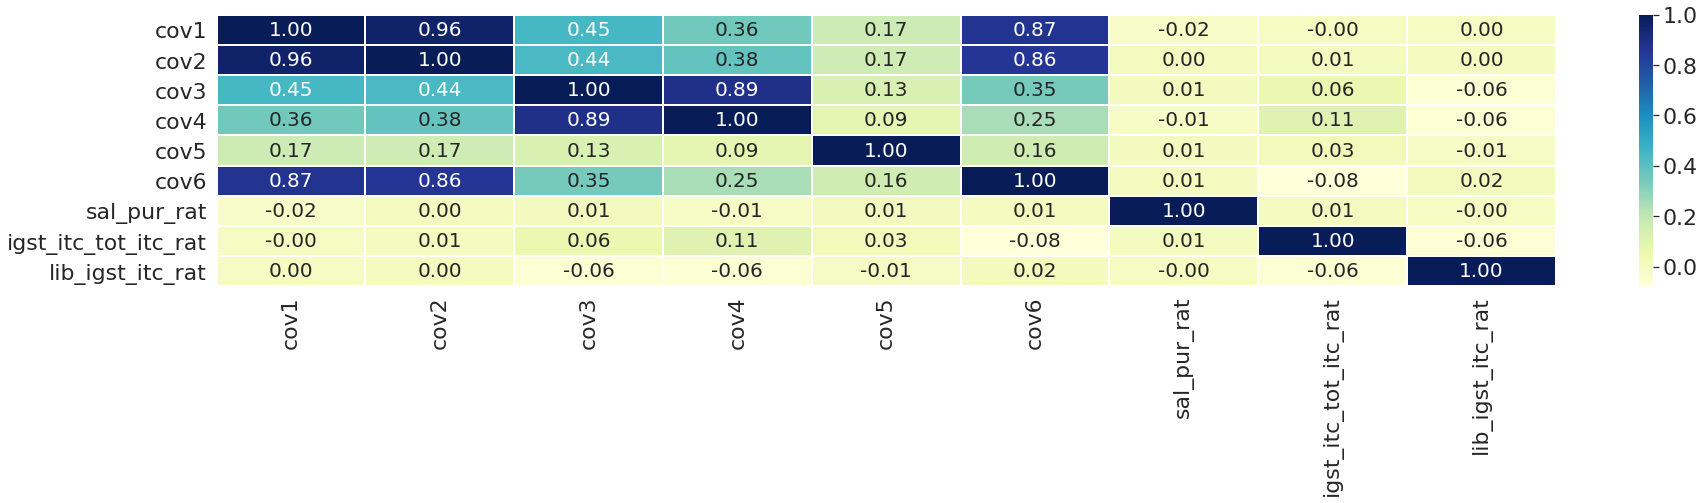

In [7]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(30, 5))
ax = sns.heatmap(
    similarity_mat,
    annot=True,
    annot_kws={"size": 20},
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=1,
)

#### **Pearson Correlation Matrix**

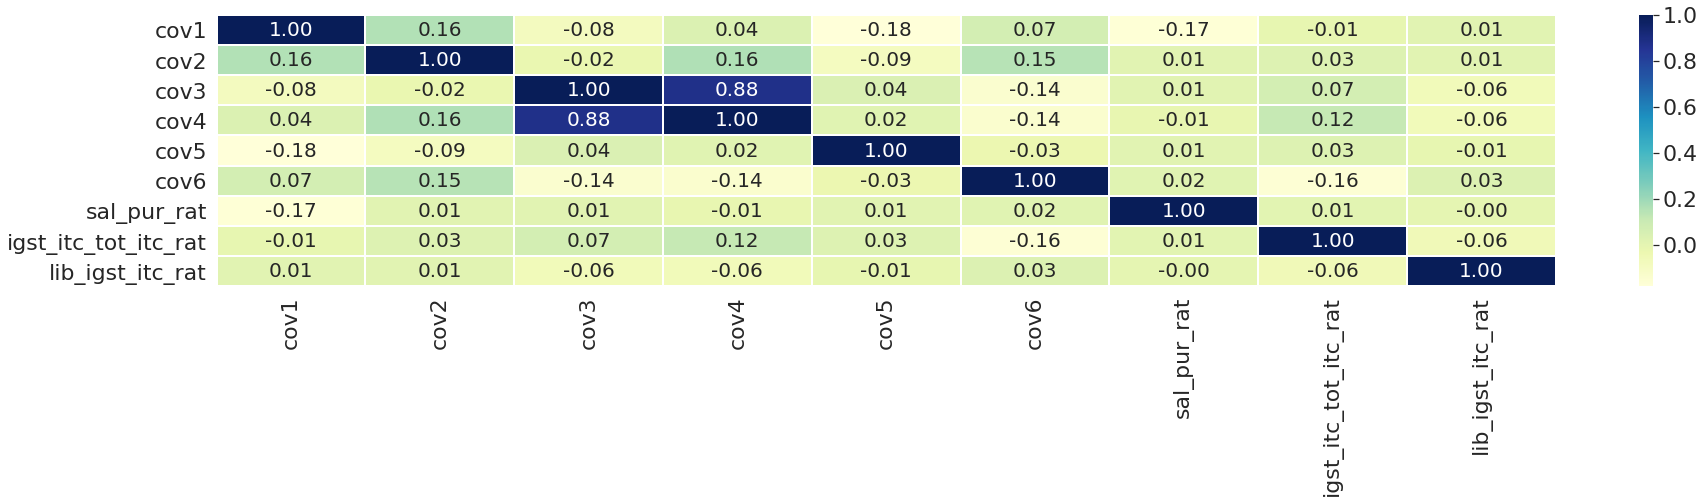

In [8]:
correlation_mat = spec_data.corr("pearson")
sns.set(font_scale=2)
fig = plt.figure(figsize=(30, 5))
ax = sns.heatmap(
    correlation_mat,
    annot=True,
    annot_kws={"size": 20},
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=1,
)

<font size='4'> **Note:** </br>
<font size='4'> 1. (cov1, cov2), (cov1, cov6), (cov2, cov6), (cov3, cov4) shares the most similarity in the data with cosine similarity 0.96, 0.87, 0.86, and 0.89 respectively. </br>
<font size='4'> 2. Cov3 and Cov4 are the most highly correlated features in the dataset with 0.88 pearson coefficient each.
</font>

### **Plotting the distribution of data points for each column.**

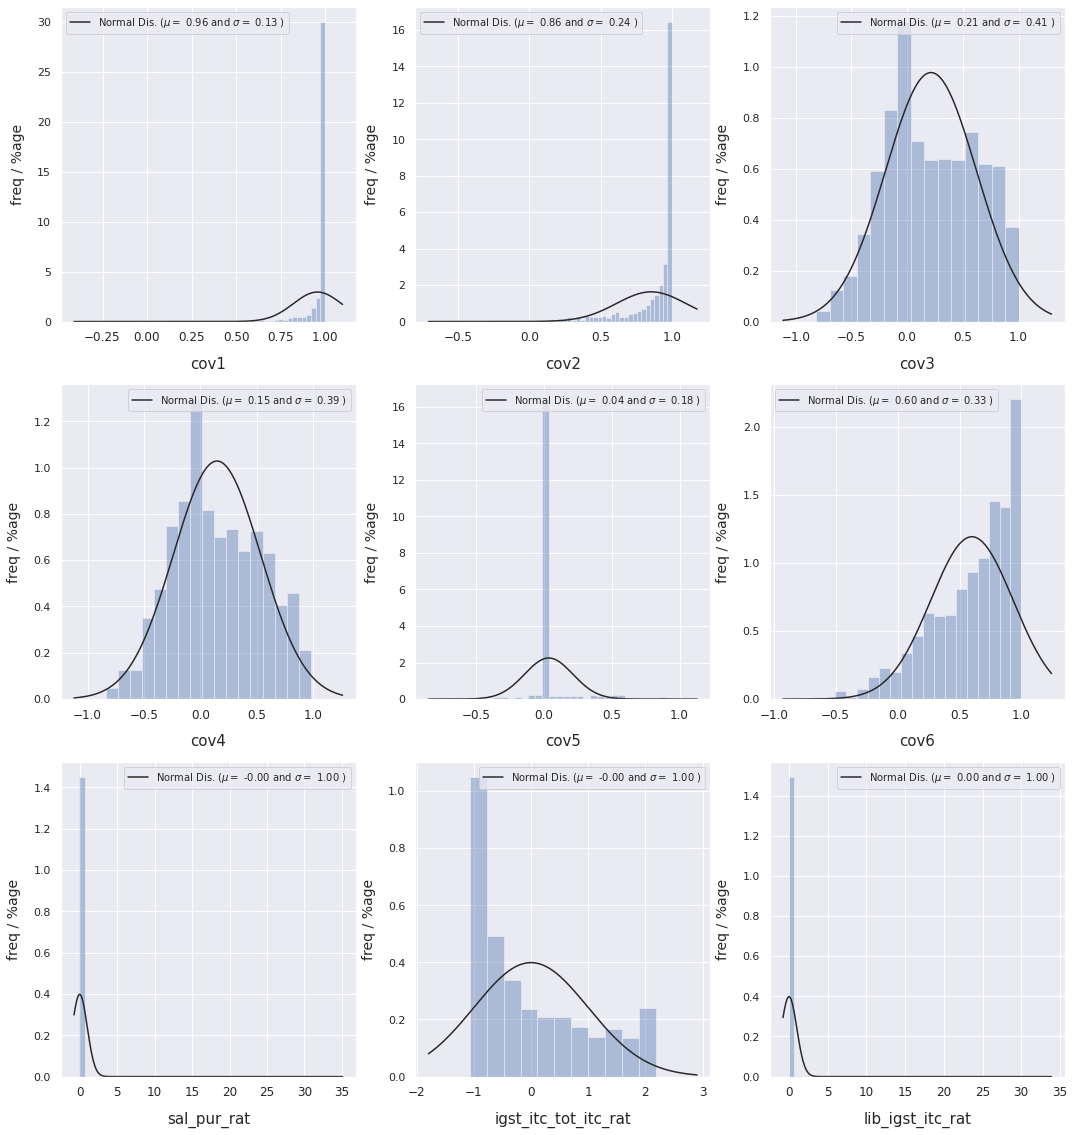

In [9]:
# Setting basic parameters for plots
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(18, 12))
plt.subplots_adjust(top=1.8)
sns.color_palette("husl", 8)
feature_list = spec_data.columns.tolist()

for index, feature in enumerate(feature_list, 1):
    plt.subplot(len(feature_list) // 2, 3, index)
    sns.distplot(spec_data[feature], fit=norm, kde=False)

    # Fitting the gaussian distribution on the data points
    if spec_data[feature].isnull().sum() < 1:
        (mu, sigma) = norm.fit(spec_data[feature])

    else:
        # Handling null values for norm API.
        (mu, sigma) = norm.fit(spec_data[feature].dropna())

    plt.legend(
        ["Normal Dis. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)],
        loc="best",
        prop={"size": 10},
    )
    plt.xlabel(f"{feature}", size=15, labelpad=12.5)
    plt.ylabel("freq / %age", size=14, labelpad=12.5)
    plt.tick_params(axis="x", labelsize=12)
    plt.tick_params(axis="y", labelsize=11)

plt.show()

### **Finding the eigen values and corresponding eigen vectors.**

In [10]:
adj_mat = rbf_kernel(spec_data)
diag_mat = np.diag(adj_mat.sum(axis=1))
L = diag_mat - adj_mat

In [11]:
eigen_values, eigen_vectors = np.linalg.eig(L)
eigen_vectors = eigen_vectors[:, np.argsort(eigen_values)]
eigen_values = eigen_values[np.argsort(eigen_values)]
eigen_values

array([-5.22047456e-13,  1.08357767e-13,  1.70322630e-13, ...,
        1.00987009e+03,  1.01038264e+03,  1.01122613e+03])

In [12]:
eigen_vectors.shape, eigen_values.shape

((1199, 1199), (1199,))

In [13]:
rounded_evalues = pd.DataFrame(np.round(eigen_values, 6), columns=["EigenValues"])
rounded_evalues.describe()

,EigenValues
count,1199.000000
mean,876.903953
std,113.363978
min,0.000000
25%,848.485265
50%,910.634706
75%,943.438408
max,1011.226130


In [14]:
rounded_evalues.quantile(0.003)

EigenValues    34.255265
Name: 0.003, dtype: float64

In [15]:
rounded_evalues.head()

,EigenValues
0,-0.000000
1,0.000000
2,0.000000
3,2.121806
4,56.218539


In [16]:
rounded_evec = np.round(eigen_vectors, 6)

In [17]:
"""Function to provide stats of distribution"""


def get_kmeans_cluster_stats(n_clusters=5, verbose=0):
    kmeans = KMeans(n_clusters=n_clusters, verbose=verbose, random_state=999)
    kmeans.fit(rounded_evec[:, 1:n_clusters])
    cluster_labels = kmeans.labels_
    cluster_values = pd.DataFrame(cluster_labels, columns=["Cluster"])
    cluster_distribution = (
        cluster_values.value_counts().reset_index().rename(columns={0: "Count"})
    )
    cluster_distribution["Coverage"] = (
        np.round(cluster_distribution["Count"] / cluster_distribution["Count"].sum(), 4)
        * 100
    ).astype(str)
    cluster_distribution["Coverage"] = cluster_distribution["Coverage"].apply(
        lambda x: x + "%"
    )
    print(
        f"Sum of Squared Error for {n_clusters} clusters is {np.round(kmeans.inertia_, 6):.6f}"
    )
    cluster_with_less_count = cluster_distribution[cluster_distribution["Count"] < 10][
        "Cluster"
    ].tolist()
    cluster_with_less_count_string = (
        ", ".join(str(x) for x in cluster_with_less_count[:-1])
        + " and "
        + str(cluster_with_less_count[-1])
    )
    print(f"Clusters with low cardinalities are {cluster_with_less_count_string}")

    for each_cluster in cluster_with_less_count:
        position_of_low_cardinality = np.argwhere(cluster_labels == each_cluster)
        position_of_low_cardinality_string = ", ".join(
            str(x[0]) for x in position_of_low_cardinality
        )
        print(f"Cluster {each_cluster} has {position_of_low_cardinality_string} row")

    print("\nCluster Distribution: \n")
    display(cluster_distribution)

    return cluster_distribution, kmeans

In [18]:
cluster_distribution, kmeans = get_kmeans_cluster_stats(n_clusters=3)

Sum of Squared Error for 3 clusters is 0.000000
Clusters with low cardinalities are 1 and 2
Cluster 1 has 202 row
Cluster 2 has 591 row

Cluster Distribution: 



,Cluster,Count,Coverage
0,0,1197,99.83%
1,1,1,0.08%
2,2,1,0.08%


In [19]:
cluster_distribution, kmeans = get_kmeans_cluster_stats(n_clusters=4)

Sum of Squared Error for 4 clusters is 0.000055
Clusters with low cardinalities are 1, 2 and 3
Cluster 1 has 202 row
Cluster 2 has 102 row
Cluster 3 has 591 row

Cluster Distribution: 



,Cluster,Count,Coverage
0,0,1196,99.75%
1,1,1,0.08%
2,2,1,0.08%
3,3,1,0.08%


In [20]:
cluster_distribution, kmeans = get_kmeans_cluster_stats(n_clusters=5)

Sum of Squared Error for 5 clusters is 0.000002
Clusters with low cardinalities are 1, 2, 3 and 4
Cluster 1 has 102 row
Cluster 2 has 202 row
Cluster 3 has 249 row
Cluster 4 has 591 row

Cluster Distribution: 



,Cluster,Count,Coverage
0,0,1195,99.67%
1,1,1,0.08%
2,2,1,0.08%
3,3,1,0.08%
4,4,1,0.08%


#### **With 3 clusters, sum of squared errors seem to be the least and hence opting for it.**

In [21]:
cluster_distribution, kmeans = get_kmeans_cluster_stats(n_clusters=3)
cluster_labels = kmeans.labels_
cluster_values = pd.DataFrame(cluster_labels, columns=["Cluster"])
cluster_distribution = (
    cluster_values.value_counts().reset_index().rename(columns={0: "Count"})
)
cluster_distribution

Sum of Squared Error for 3 clusters is 0.000000
Clusters with low cardinalities are 1 and 2
Cluster 1 has 202 row
Cluster 2 has 591 row

Cluster Distribution: 



,Cluster,Count,Coverage
0,0,1197,99.83%
1,1,1,0.08%
2,2,1,0.08%


,Cluster,Count
0,0,1197
1,1,1
2,2,1


#### **Relatively approx no such points in cluster 2 and 3 and hence those points can be considered as outliers as majority coverage has been done by the cluster-1.**